# Homework 3

## Mark Borjas (mab7886)
## Normal and t distributions
## t-test


An experiment was conducted to determine the effect of children participating in a given meal preparation on calorie intake for that meal. Data are recorded below. 

Save the data to a format that can be read into python. Read the data in for analysis. Data is provided in two separted CSV files. 

* Use python to calculate the quantities and generate the visual summaries requested below. You will lose points if you are not utilizing python.

* You can use scipy libary or other libraries to do your tests or you can implement them from scratch in python 



In [64]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Question - 1
Summarize the data by whether children participated in the meal preparation or not. Use an appropriately labelled table to show the results. Also include a graphical presentation that shows the distribution of calories for participants vs. non-participants. Describe the shape of each distribution and comment on the similarity (or lack thereof) between the distributions in each population. **(2 points)**


In [44]:
part = pd.read_csv('participants.csv')
non_part = pd.read_csv('nonparticipants.csv')
non_sum = non_part.describe()
print(" ")
print("Nonparticipants calorie intake")
non_sum

 
Nonparticipants calorie intake


,nonparticipants
count,22.000000
mean,374.071818
std,133.139285
min,139.690000
25%,296.392500
50%,374.740000
75%,445.557500
max,688.770000


In [45]:

part_sum = part.describe()

print("Participants calorie intake")
part_sum


Participants calorie intake


,participants
count,25.000000
mean,410.079600
std,121.513786
min,210.990000
25%,298.380000
50%,424.940000
75%,456.300000
max,635.210000


Both grahps sort of have similar shapes but are definitely not symtrical. The non participants graph looks likes it has more data within the 300-500 calories range, but this might not be true as the participants also has a lot of data within that range. Additionally, the participants graph doesnt seem to have data in the less than (<) 200 calorie range while the other has data < 200. 

Distribution of calories for participants vs. non-participants


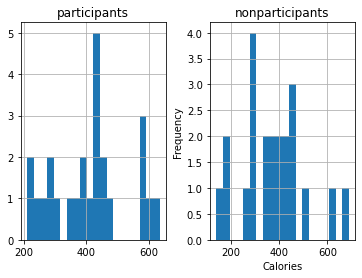

In [143]:
both = pd.concat([part, non_part], axis = 1)


hist = both.hist(bins=20)

plt.xlabel("Calories")

plt.ylabel("Frequency")
print("Both grahps sort of have similar shapes but are definitely not symtrical. The non participants graph looks likes it has more data within the 300-500 calories range, but this might not be true as the participants also has a lot of data within that range. Additionally, the participants graph doesnt seem to have data in the less than (<) 200 calorie range while the other has data < 200. ")
print()
print("Distribution of calories for participants vs. non-participants")

# Question - 2 

Does the mean calorie consumption for those who participated in the meal preparation differ from **425**? Formally test at the $\alpha = 0.05$ level using the 5 steps outlined in the module. **(6 points)**


In [115]:
print("1. H0∶μ=425(mean calorie consumption for those who participated in the meal preparation does not differ from 425)")
print()
print("H1∶μ≠425(mean calorie consumption for those who participated in the meal preparation differs from 425) α=0.05")
print()
print("2. Using two-sided t test since n is small")
print("Degrees of freedom = 25-1")
critical = stats.t.ppf(q=1-.05,df=24)
print("Critical value =", critical)
result = stats.ttest_1samp(part, 425, alternative = 'two-sided')
print()
#print(result)
print("test stat =", result.statistic)
print("p value =", result.pvalue)
print("3.  Decision Rule:  Reject H0 if p−value ≤ α Otherwise, do not reject  H0")
print("4." + str(result.pvalue) + " > α=0.05 ")
if result.pvalue < 0.05:    # alpha value 
   print("5.we are rejecting null hypothesis")
   print("H1∶μ≠425")
else:
  print("5.we fail to reject the null hypothesis")
  print("H0∶μ=425")
  print("We do not have significant evidence at theα=0.05 level to conclude that  participants mean calorie value is not equal to 425")

1. H0∶μ=425(mean calorie consumption for those who participated in the meal preparation does not differ from 425)

H1∶μ≠425(mean calorie consumption for those who participated in the meal preparation differs from 425) α=0.05

2. Using two-sided t test since n is small
Degrees of freedom = 25-1
Critical value = 1.7108820799094275

test stat = [-0.61393857]
p value = [0.54503195]
3.  Decision Rule:  Reject H0 if p−value ≤ α Otherwise, do not reject  H0
4.[0.54503195] > α=0.05 
5.we fail to reject the null hypothesis
H0∶μ=425
5.We do not have significant evidence at theα=0.05 level to conclude that  participants mean calorie value is not equal to 425


# Question -3 
Calculate a **90%** confidence interval for the mean calorie intake for participants in the meal preparation. Interpret the confidence interval. **(6 points)**

In [116]:
print("90% Confidence interval")
result = stats.t.interval(0.90, len(part)-1, loc=np.mean(part), scale=stats.sem(part))
print("("+str(result[0])+","+ str(result[1])+")")
print("The 90% confidence interval contained the null value of 425 which fails to reject the null hypothesis, and the two-sided significance test at the α=0.05 level did not reject the null hypothes that μ=425, the actual mean may indeed be 425 .")
print("We do not have significant evidence at theα=0.05 level to conclude that  participants mean calorie value is not equal to 425")

90% Confidence interval
([368.50044816],[451.65875184])
The 90% confidence interval contained the null value of 425 which fails to reject the null hypothesis, and the two-sided significance test at the α=0.05 level did not reject the null hypothes that μ=425, the actual mean may indeed be 425 .
We do not have significant evidence at theα=0.05 level to conclude that  participants mean calorie value is not equal to 425


# Question 4 
Formally test whether or not participants consumed 
more calories than non-participants at the $\alpha = 0.05$ level using the 5 steps procedure for hypothesis tests. **(6 points )**

In [114]:
print("1. H0∶μparticipants=μnonparticipants (participants consumed the same amount of calories than non_participants)")
print()
print("H1∶μparticipants>μnonpartipants(calorie consumption for those who participated is greater than nonparticipants at the sig level α=0.05")
print()
print("2. Using two-sample two-sided t test since both n is small")
#print("Degrees of freedom = 22-1")
#critical = stats.t.ppf(q=1-.05,df=21)
#print("Critical value =", critical)
#result = stats.ttest_ind(part, non_part, alternative="greater")
print()
#print(result)
print("3.  Decision Rule:  Reject H0 if p−value ≤ α Otherwise, do not reject  H0")
print("test stat =", result.statistic)
print("p value =", result.pvalue)

print("4." + str(result.pvalue) + " > α=0.05 ")
if result.pvalue < 0.05:    # alpha value 
   print("we are rejecting null hypothesis")
   print("H1∶μpartipants>μnonpartipants")
else:
  print("we fail to reject the null hypothesis")
  print("H0∶μparticipants=μnonparticipants")
  print("5.We do not have significant evidence at theα=0.05 level to conclude that  participants a greater amount of calories than non_participants")

1. H0∶μparticipants=μnonparticipants (participants consumed the same amount of calories than non_participants)

H1∶μparticipants>μnonpartipants(calorie consumption for those who participated is greater than nonparticipants at the sig level α=0.05

2. Using two-sample two-sided t test since both n is small

3.  Decision Rule:  Reject H0 if p−value ≤ α Otherwise, do not reject  H0
test stat = [0.96935044]
p value = [0.16877591]
4.[0.16877591] > α=0.05 
we fail to reject the null hypothesis
H0∶μparticipants=μnonparticipants
5.We do not have significant evidence at theα=0.05 level to conclude that  participants a greater amount of calories than non_participants
